# Lab Segmentation 2


In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [103]:
def getThreshold(image, greyScaleSize=256):
    imageSize = image.shape[0] * image.shape[1]
    hist = np.zeros(greyScaleSize)

    # 1- Convert the image to Unit8.
    image = (image * 255).astype("uint8")

    # 2- Get counts array that contains the number of pixels in each grey-level.
    unique, unique_counts = np.unique(image, return_counts=True)
    hist[unique] = unique_counts
    unique = np.insert(unique, 0, 0)

    # 3- Get initial threshold by getting the average mean of the pixels’ grey-level
    greylevels = np.arange(greyScaleSize)
    Tinit = round(np.sum(hist * greylevels) / imageSize)

    # 4- Get the two weighted averages (means), one for the lower pixels (have gray level
    # less than Tinit) and the other for the higher pixels (have gray level more than Tinit).
    prevTinit = 0
    while not (Tinit == prevTinit):
        Mean1 = round(np.sum(hist[:Tinit] * greylevels[:Tinit]) / imageSize)
        Mean2 = round(np.sum(hist[Tinit:] * greylevels[Tinit:]) / imageSize)
        prevTinit = Tinit
        Tinit = (Mean1 + Mean2) // 2

    print("final outpu", Tinit, Mean1, Mean2)
    return Tinit


def Threshold(image, greyScaleSize=256):
    original = np.copy(image)
    Threshold = getThreshold(image, greyScaleSize)
    image[image >= Threshold] = 255
    image[image < Threshold] = 0
    show_images(images=[original, image], titles=["Original Image", "Thresholed Image"])


def Threshold2(image, greyScaleSize=256):
    original = np.copy(image)
    Threshold = getThreshold(image, greyScaleSize) / (greyScaleSize - 1)
    image[image >= Threshold] = 1
    image[image < Threshold] = 0
    show_images(images=[original, image], titles=["Original Image", "Thresholed Image"])


final outpu 68 1 136


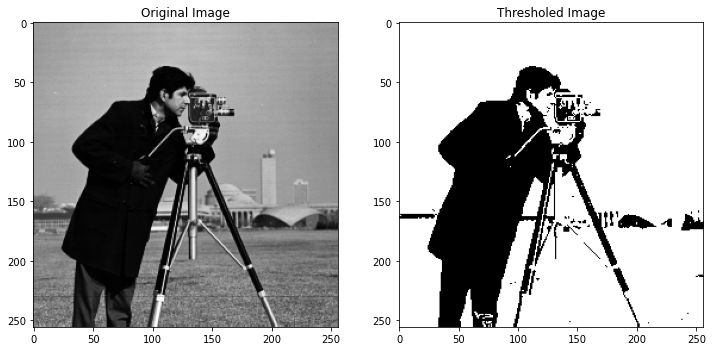

final outpu 82 10 154


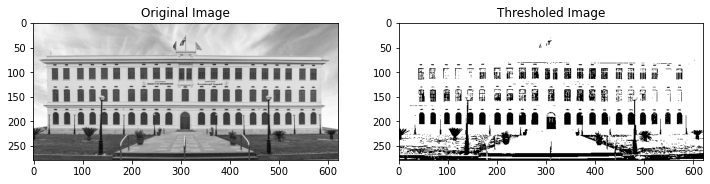

final outpu 78 0 156


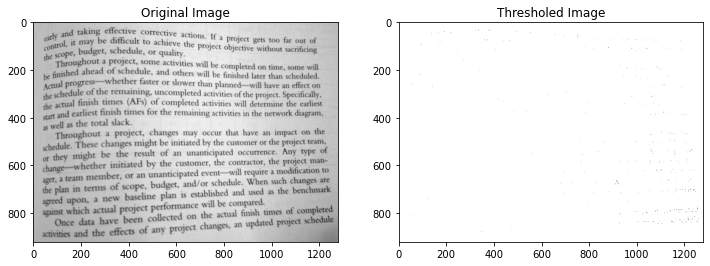

final outpu 64 3 125


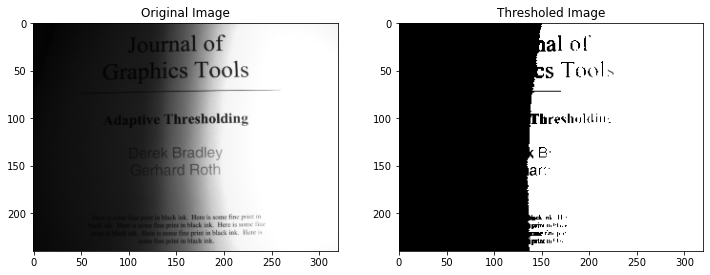

In [105]:
cameraman_image = io.imread("./cameraman.png")
Threshold(cameraman_image)

cufe_image = rgb2gray(io.imread("./cufe.png"))
Threshold2(cufe_image)

book1_image = rgb2gray(io.imread("./book1.png"))
Threshold2(book1_image)

book_image = io.imread("./book.png")
Threshold(book_image)